### Data Dictionary

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

#from pycaret.classification import *
from pycaret.clustering import *
#from pycaret.regression import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("Cust_Segmentation.csv")

In [3]:
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   Address          850 non-null    object 
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 59.9+ KB


In [5]:
df.describe(include='all')

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850,850.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBA002,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,NaN,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,NaN,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,NaN,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,NaN,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,NaN,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,NaN,13.800000


In [6]:
df.shape

(850, 9)

In [7]:
df.columns

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',
       'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

### Data Exploration

### Data Visualization

### Univariate Data Exploration

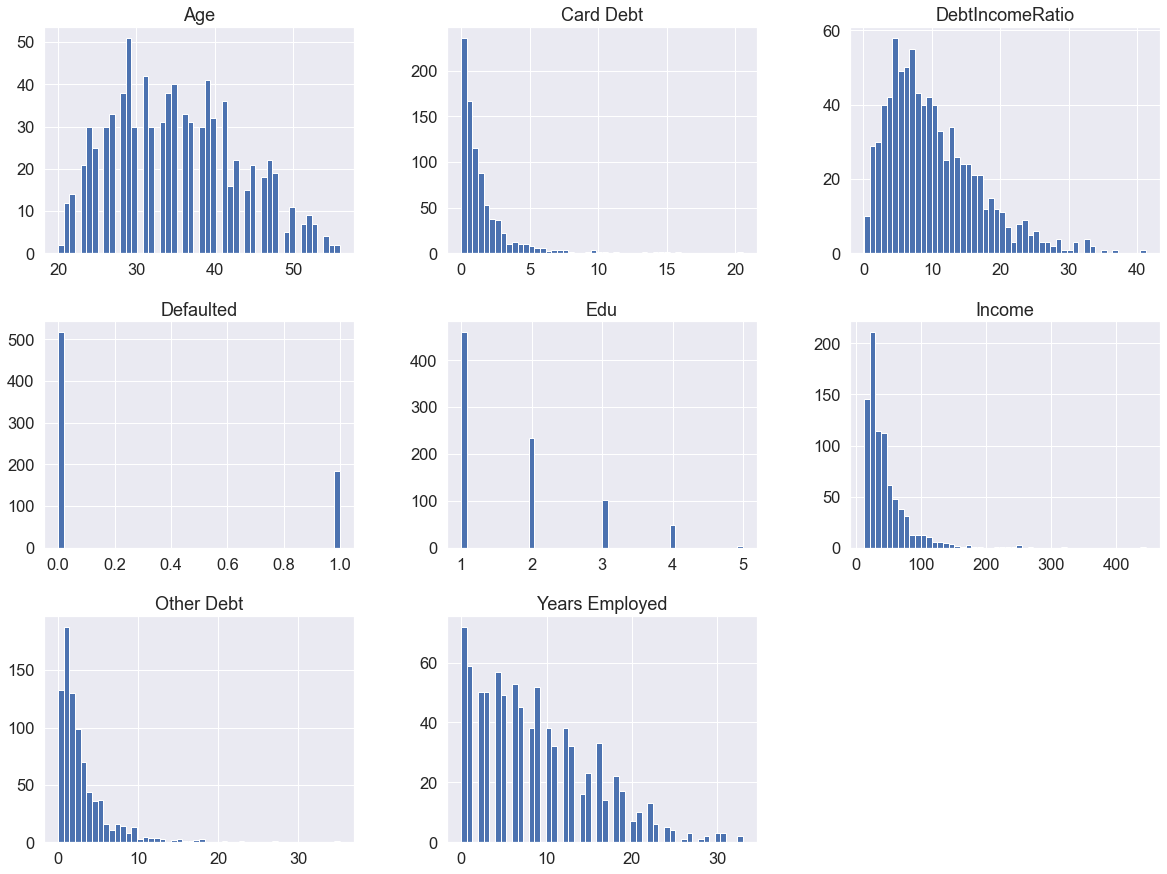

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
df.corr()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Age,1.000000,0.012983,0.554241,0.476218,0.278912,0.337839,-0.137657,0.008240
Edu,0.012983,1.000000,-0.151117,0.218219,0.099081,0.140938,0.114676,0.008053
Years Employed,0.554241,-0.151117,1.000000,0.625093,0.381744,0.414430,-0.282978,-0.033625
Income,0.476218,0.218219,0.625093,1.000000,0.551510,0.603356,-0.070970,-0.035585
Card Debt,0.278912,0.099081,0.381744,0.551510,1.000000,0.644955,0.244734,0.514971
Other Debt,0.337839,0.140938,0.414430,0.603356,0.644955,1.000000,0.145716,0.572545
Defaulted,-0.137657,0.114676,-0.282978,-0.070970,0.244734,0.145716,1.000000,0.389575
DebtIncomeRatio,0.008240,0.008053,-0.033625,-0.035585,0.514971,0.572545,0.389575,1.000000


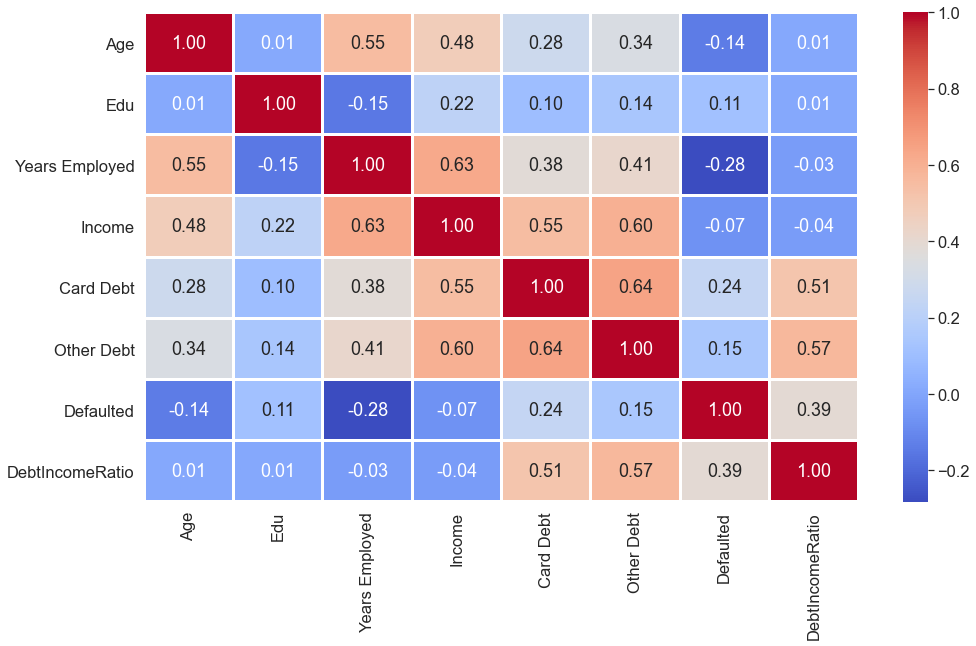

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

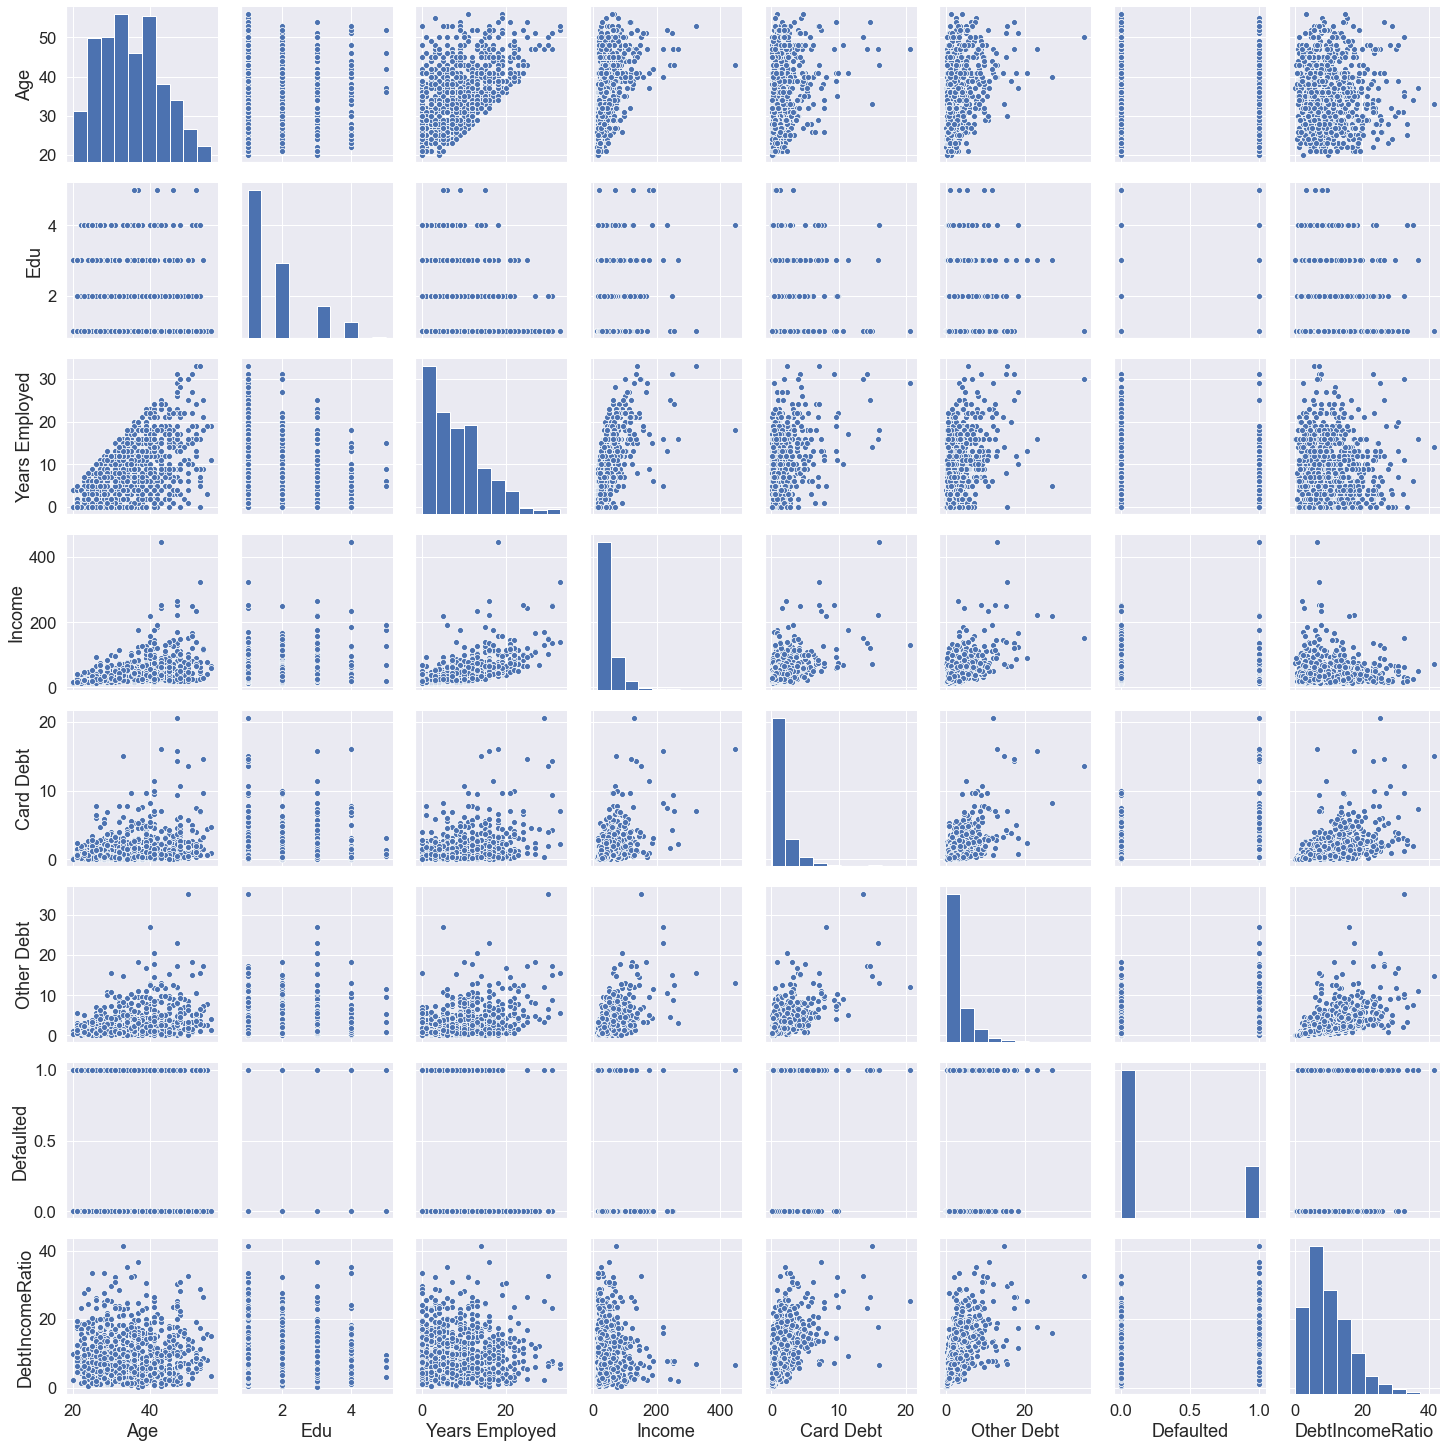

In [11]:
sns.pairplot(df)
plt.show()

### Model Training

### Using PyCaret

In [12]:
exp_clu = setup(data = df, session_id=123, normalize=True) 


Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Original Data,"(850, 9)"
2,Missing Values,True
3,Numeric Features,6
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(850, 44)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [13]:
kmeans = create_model('kmeans', num_clusters=3)

In [14]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)


In [15]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
0,41,2,6,19,0.124,1.073,0.0,NBA001,6.3,Cluster 2
1,47,1,26,100,4.582,8.218,0.0,NBA021,12.8,Cluster 1
2,33,2,10,57,6.111,5.802,1.0,NBA013,20.9,Cluster 0
3,29,2,4,19,0.681,0.516,0.0,NBA009,6.3,Cluster 2
4,47,1,31,253,9.308,8.908,0.0,NBA008,7.2,Cluster 1


In [16]:
plot_model(kmeans)

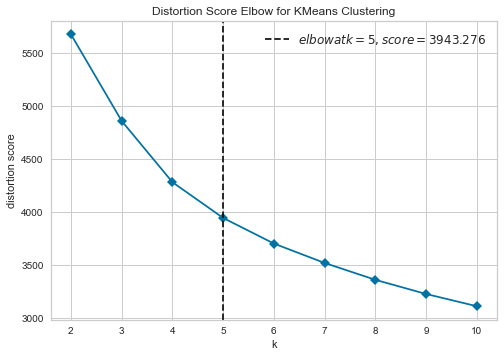

In [17]:
plot_model(kmeans, plot = 'elbow')

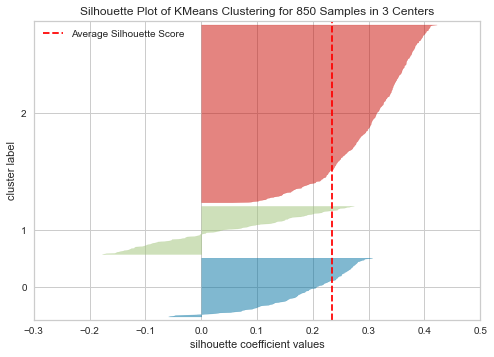

In [18]:
plot_model(kmeans, plot = 'silhouette')

In [19]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters